### Support Vector Machines (think of a wide street separating vectors)

large margin classification, adding more training instances will not affect the bounary decisions. The supported vectors are on the edge of the street

hard margin all data is easily linearly separble, a more flexable solution is to use soft margin classification

In [3]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2) # Iris virginica

svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, random_state=42))
svm_clf.fit(X, y)

/Users/mathias/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [4]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [5]:
svm_clf.decision_function(X_new) # distance between each instance

array([ 0.66163411, -0.22036063])

### If its hard to linearly fit data because its not separable use a PolynomialFeatures transformer

This will create more of a curved line to separate

In [16]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, random_state=42)
)
polynomial_svm_clf.fit(X, y)

/Users/mathias/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

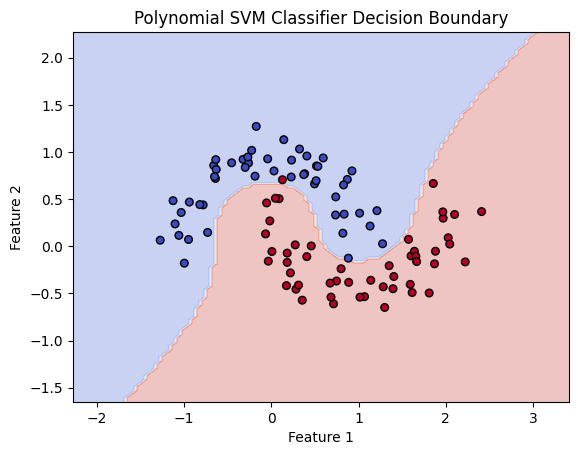

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Create a meshgrid for plotting the decision boundary
x0, x1 = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)
)

# Get predictions for each point in the grid
Z = polynomial_svm_clf.predict(np.c_[x0.ravel(), x1.ravel()])
Z = Z.reshape(x0.shape)

# Plot the decision boundary with background colors
plt.contourf(x0, x1, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', marker='o')

# Add labels and title
plt.title('Polynomial SVM Classifier Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

Using kernel trick without adding a polynomial features

In [23]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel="poly", degree=3, coef0=1, C=5))
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

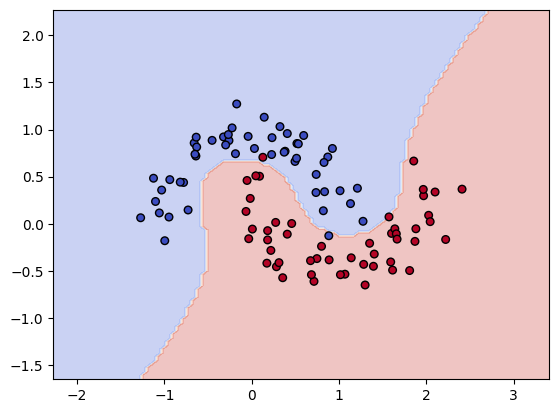

In [24]:
Z = poly_kernel_svm_clf.predict(np.c_[x0.ravel(), x1.ravel()])
Z = Z.reshape(x0.shape)

plt.contourf(x0, x1, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', marker='o')

plt.show()

### Similarity Features 

Gaussian RBF

In [35]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel="rbf", gamma=5, C=0.001))
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

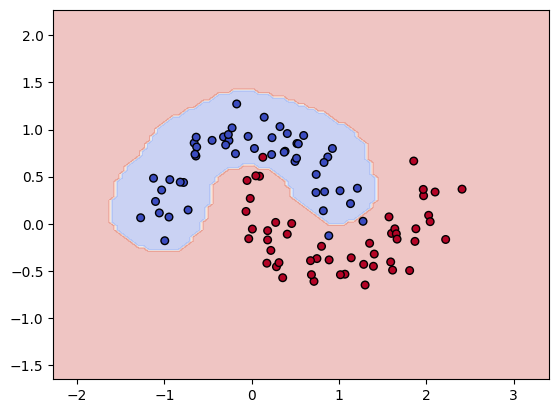

In [36]:
Z = rbf_kernel_svm_clf.predict(np.c_[x0.ravel(), x1.ravel()])
Z = Z.reshape(x0.shape)

plt.contourf(x0, x1, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', marker='o')

plt.show()

Always start with a Linear kernel (if unknown what to use), LinearSVC is faster than SVC(kernal="linear")

### SVM Regression

fit as many instances as possible on the street while limiting margin violations

/Users/mathias/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


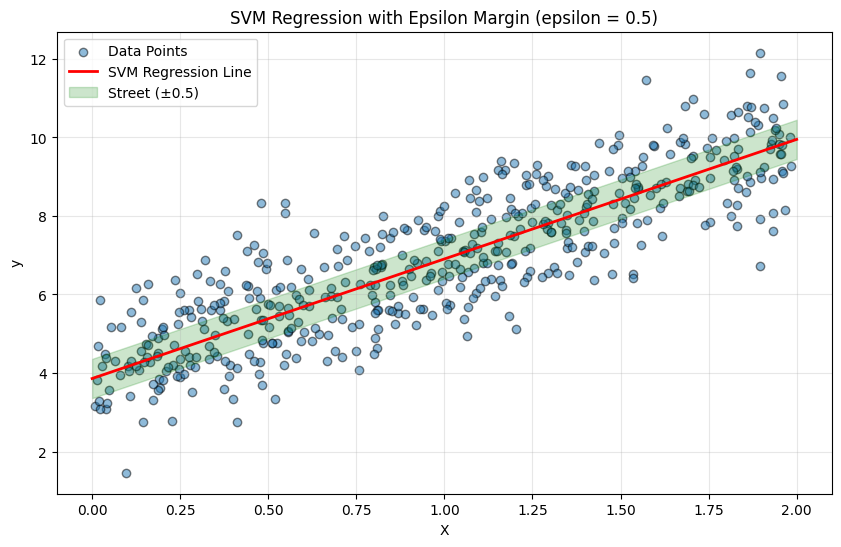

In [58]:
from sklearn.svm import LinearSVR

X = 2 * np.random.rand(500, 1)  # Feature values between 0 and 2
y = 4 + 3 * X + np.random.randn(500, 1)  # Linear relation with some random noise

svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon=0.5, random_state=42))
# non-linear:
# X, y = [...] # a quadratic dataset
# svm_poly_reg = make_pipeline(StandardScaler(),
#                              SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))
# svm_poly_reg.fit(X, y)

svm_reg.fit(X, y.ravel())

# Generate predictions for the regression line
X_new = np.linspace(0, 2, 500).reshape(-1, 1)  # Generate points for plotting
y_pred = svm_reg.predict(X_new)  # Predicted regression line

# Visualization of the street
# Use the model to predict on X and visualize the "street" width defined by epsilon
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, edgecolor='k', marker='o', label='Data Points')  # Original data points
plt.plot(X_new, y_pred, color='r', linewidth=2, label='SVM Regression Line')  # Regression line

# Highlight the "street" area (epsilon margin)
plt.fill_between(X_new.ravel(), y_pred - epsilon, y_pred + epsilon,
                 color='g', alpha=0.2, label=f'Street (±{epsilon})')

# Add labels, legend, and title
plt.title(f'SVM Regression with Epsilon Margin (epsilon = {epsilon})')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

LinearSVR (Support Vector Regressor) is the regression equivalent of LinearSVC (Support Vector Classifier)

Both are linear models, meaning they assume the data is linearly separable or linearly related.
If the data is not linear, you can use kernelized versions (SVC or SVR) to apply transformations (e.g., RBF kernel, polynomial kernel).

# Differences Between LinearSVC and LinearSVR

| Feature               | **LinearSVC (Support Vector Classifier)**       | **LinearSVR (Support Vector Regressor)**           |
|-----------------------|-------------------------------------------------|----------------------------------------------------|
| **Type of Task**       | Classification                                  | Regression                                         |
| **Output**             | Class labels (e.g., 0 or 1, or multiclass)      | Continuous values (e.g., real numbers)            |
| **Objective**          | Find a hyperplane to separate classes           | Fit a hyperplane within the epsilon margin         |
| **Margin Interpretation** | Widest margin separating the classes           | Tolerance band ("epsilon tube") around predictions |
| **Loss Function**      | Hinge Loss                                      | Epsilon-Insensitive Loss                          |
| **Goal**               | Minimize classification errors and maximize margin | Minimize errors outside the `epsilon` margin      |
| **When to Use**        | For classification problems (e.g., spam detection, binary classification) | For regression problems (e.g., predicting house prices) |
| **Hyperparameter (C)** | Controls the trade-off between margin width and classification errors | Controls the trade-off between margin width and tolerance violations |

---

Under the hood of Linear SVM classifiers

to increase margin of street we minimize w while avoiding margin violations
Hard margin linear SVM classifier objective:

1/2 w^Tw

soft margin objective

slack variable ζ(i) ≥ 0 (measures how much ith is allowed to violate the margin)

C hyperparamter defines the tradeoffs between these two

1/2 w^Tw + C∑  ζi

The hard margin and soft margin problems are both convex quadratic optimization
problems with linear constraints. Such problems are known as quadratic programming (QP) problems.

Using a QP solver is one way to train an SVM, another is to use gradient descent (hinge or squared hinge loss)

LinearSVC uses squared hinge loss, SGDClassifier uses hinge loss

tranformed vector 2D -> 3D
$$
\Phi(\mathbf{x}) = \Phi\left([x_1, x_2]\right) = 
\begin{bmatrix}
x_1^2 \\
\sqrt{2} \cdot x_1 \cdot x_2 \\
x_2^2
\end{bmatrix}
$$


### Kernel Trick for Second-Degree Polynomial Mapping

Given two vectors transforms them into 3D space:

$$
\Phi(\mathbf{a}) = 
\begin{bmatrix} 
a_1^2 \\
\sqrt{2} \cdot a_1 \cdot a_2 \\
a_2^2
\end{bmatrix}, \quad
\Phi(\mathbf{b}) = 
\begin{bmatrix} 
b_1^2 \\
\sqrt{2} \cdot b_1 \cdot b_2 \\
b_2^2
\end{bmatrix}
$$

### Inner Product in the Transformed Space:
The inner product in the transformed space is:

$$
\Phi(\mathbf{a})^\top \Phi(\mathbf{b}) = a_1^2 b_1^2 + \sqrt{2} \cdot a_1 a_2 b_1 b_2 + a_2^2 b_2^2
$$

### Kernel Trick (Polynomial Kernel):
Instead of computing the transformed vectors explicitly, we can use the polynomial kernel function to compute the inner product directly:

$$
K(\mathbf{a}, \mathbf{b}) = (\mathbf{a}^\top \mathbf{b} + 1)^2
$$

This kernel function computes the same result as \(\Phi(\mathbf{a})^\top \Phi(\mathbf{b})\), without needing to transform the vectors explicitly.

### Expanded Polynomial Kernel:
When expanded, the kernel function gives:

$$
K(\mathbf{a}, \mathbf{b}) = (a_1 b_1 + a_2 b_2 + 1)^2 = a_1^2 b_1^2 + 2 a_1 a_2 b_1 b_2 + a_2^2 b_2^2 + 2 a_1 b_1 + 2 a_2 b_2 + 1
$$

This is the same as the original inner product, proving that the kernel trick enables the computation in the higher-dimensional space without performing the explicit transformation.

You don't need to transform the training instances at all, replace the dot
product by its square. The result will be strictly the same as if you
had gone through the trouble of transforming the training set and then fitting a linear
SVM algorithm, this trick makes the whole process much more computationally
efficient.

COME BACK TO THIS FOR MORE RESEARCH:
- Making predictions with a kernelized SVM
- Using the kernel trick to compute the bias term